In [1]:
from sklearn.datasets import load_breast_cancer
import matplotlib.pyplot as plt
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [2]:
cancer = load_breast_cancer()
print("Features: ", cancer.feature_names)
print("Labels: ", cancer.target_names)


Features:  ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Labels:  ['malignant' 'benign']


In [3]:
X = cancer.data[:, :2] # Using only the first two features 
y = cancer.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
#Build the model
svm = SVC(kernel="rbf", gamma=0.5, C=1.0)
# Trained the model
svm.fit(X_train, y_train)

y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)
print('Classification Report:')
print(report)

Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.86      0.86        43
           1       0.92      0.92      0.92        71

    accuracy                           0.89       114
   macro avg       0.89      0.89      0.89       114
weighted avg       0.89      0.89      0.89       114



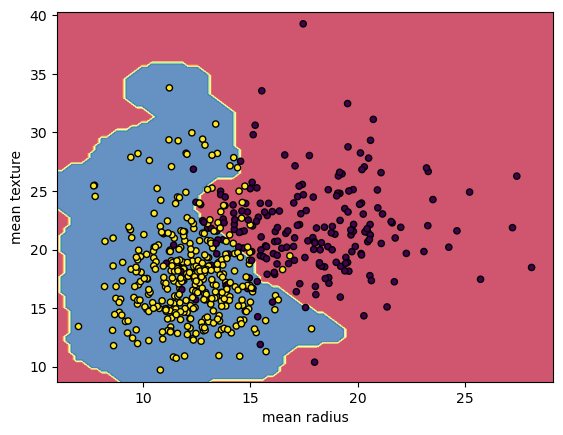

In [5]:
DecisionBoundaryDisplay.from_estimator(
        svm,
        X,
        response_method="predict",
        cmap=plt.cm.Spectral,
        alpha=0.8,
        xlabel=cancer.feature_names[0],
        ylabel=cancer.feature_names[1],
    )
# Scatter plot
plt.scatter(X[:, 0], X[:, 1], 
            c=y, 
            s=20, edgecolors="k")
plt.show()

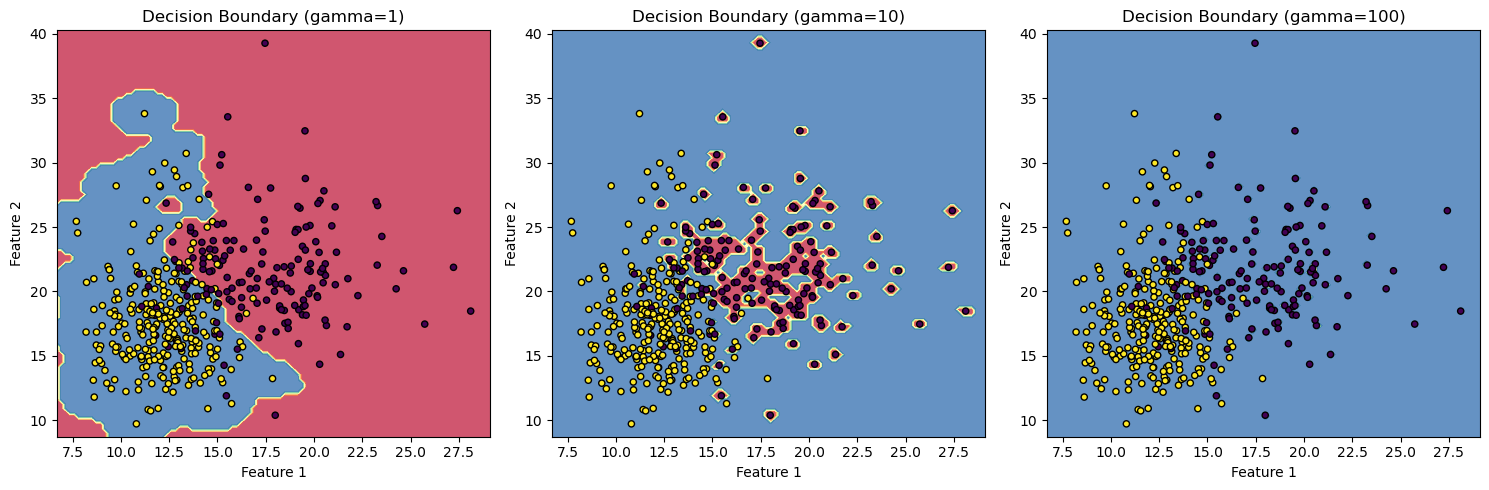

Gamma = 1
Accuracy: 0.9035
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87        43
           1       0.93      0.92      0.92        71

    accuracy                           0.90       114
   macro avg       0.90      0.90      0.90       114
weighted avg       0.90      0.90      0.90       114

Gamma = 10
Accuracy: 0.7807
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.51      0.64        43
           1       0.76      0.94      0.84        71

    accuracy                           0.78       114
   macro avg       0.80      0.73      0.74       114
weighted avg       0.79      0.78      0.77       114

Gamma = 100
Accuracy: 0.6228
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.02      0.04        43
           1       0.62      0.99      0.77        71

    accuracy                 

In [9]:
gamma_values = [1, 10, 100]

# Create subplots
fig, axes = plt.subplots(1, len(gamma_values), figsize=(15, 5))

for i, gamma in enumerate(gamma_values):
    # Build the model
    svm = SVC(kernel="rbf", gamma=gamma, C=1.0)
    
    # Train the model
    svm.fit(X_train, y_train)

    # Plot Decision Boundary
    DecisionBoundaryDisplay.from_estimator(
        svm,
        X_train,
        response_method="predict",
        cmap=plt.cm.Spectral,
        alpha=0.8,
        xlabel="Feature 1",
        ylabel="Feature 2",
        ax=axes[i]  # Use the respective subplot
    )
    
    axes[i].set_title(f'Decision Boundary (gamma={gamma})')

    # Scatter plot
    axes[i].scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=20, edgecolors="k")

# Adjust layout
plt.tight_layout()
plt.show()

# Evaluate the models (you can do this outside the loop)
for gamma in gamma_values:
    svm = SVC(kernel="rbf", gamma=gamma, C=1.0)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print(f'Gamma = {gamma}')
    print(f'Accuracy: {accuracy:.4f}')
    print('Classification Report:')
    print(report)


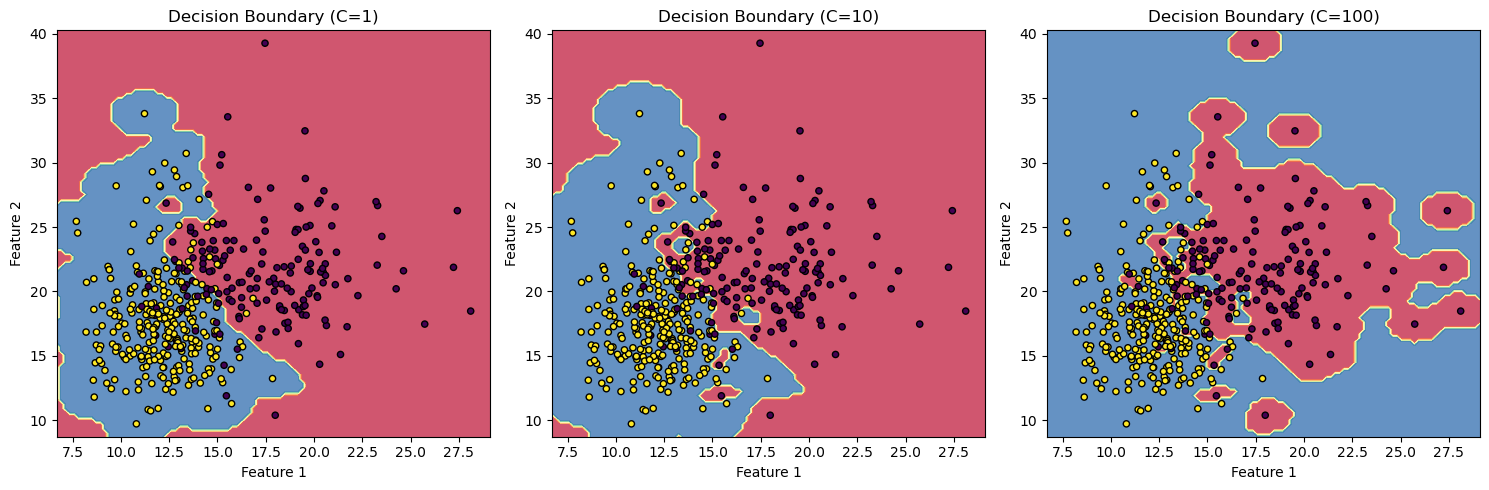

C = 1
Accuracy: 0.9035
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.88      0.87        43
           1       0.93      0.92      0.92        71

    accuracy                           0.90       114
   macro avg       0.90      0.90      0.90       114
weighted avg       0.90      0.90      0.90       114

C = 10
Accuracy: 0.9123
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89        43
           1       0.94      0.92      0.93        71

    accuracy                           0.91       114
   macro avg       0.90      0.91      0.91       114
weighted avg       0.91      0.91      0.91       114

C = 100
Accuracy: 0.8772
Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.84      0.84        43
           1       0.90      0.90      0.90        71

    accuracy                           0.

In [10]:
C_values = [1, 10, 100]

# Create subplots
fig, axes = plt.subplots(1, len(C_values), figsize=(15, 5))

for i, c in enumerate(C_values):
    # Build the model
    svm = SVC(kernel="rbf", gamma=1, C=c)
    
    # Train the model
    svm.fit(X_train, y_train)

    # Plot Decision Boundary
    DecisionBoundaryDisplay.from_estimator(
        svm,
        X_train,
        response_method="predict",
        cmap=plt.cm.Spectral,
        alpha=0.8,
        xlabel="Feature 1",
        ylabel="Feature 2",
        ax=axes[i]  # Use the respective subplot
    )
    axes[i].set_title(f'Decision Boundary (C={c})')

    # Scatter plot
    axes[i].scatter(X_train[:, 0], X_train[:, 1], c=y_train, s=20, edgecolors="k")

# Adjust layout
plt.tight_layout()
plt.show()

# Evaluate the models (you can do this outside the loop)
for c in C_values:
    svm = SVC(kernel="rbf", gamma=1, C=c)
    svm.fit(X_train, y_train)
    y_pred = svm.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    print(f'C = {c}')
    print(f'Accuracy: {accuracy:.4f}')
    print('Classification Report:')
    print(report)
